# Feature engineering

In [12]:
# import 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
bids = pd.read_csv('Data/bids.csv')
bidder = pd.read_csv('Data/train.csv')

In [54]:
bidder.head(5)
bidder.shape

(2013, 4)

### train and test set

In [14]:
X_bidder = bidder.drop(['outcome'],axis=1)
y_bidder = bidder['outcome']
X_train, X_test, y_train, y_test = train_test_split(X_bidder, y_bidder, random_state=42, stratify=y_bidder)

In [41]:
df_train = pd.merge(bids, pd.concat([X_train, y_train], axis=1), on='bidder_id', how='inner')
df_test = pd.merge(bids, pd.concat([X_test, y_test], axis=1), on='bidder_id', how='inner')

In [65]:
print(df_train.shape, df_test.shape)

(2356675, 12) (714549, 12)


Encoding
- pd.concat() unisce le colonne bidder_id di df_train e df_test.
- .unique() restituisce una lista di valori univoci di bidder_id presenti in entrambi i dataset, eliminando duplicati.
- enumerate(unique_bidders) associa un indice numerico (da 0 in poi) a ciascun valore unico di bidder_id.
- Successivamente viene creata la nuova colonna 'encoded_bidder_id' e viene riempita con i valori corrispondenti nella mappa

In [42]:
unique_bidders = pd.concat([df_train['bidder_id'], df_test['bidder_id']]).unique()
bidder_mapping = {bidder_id: idx for idx, bidder_id in enumerate(unique_bidders)}
df_train['encoded_bidder_id'] = df_train['bidder_id'].map(bidder_mapping)
df_test['encoded_bidder_id'] = df_test['bidder_id'].map(bidder_mapping)

In [43]:
df_train.drop('bidder_id',axis=1,inplace=True)
df_test.drop('bidder_id',axis=1,inplace=True)

In [88]:
df_train.head(5)

,bid_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome,encoded_bidder_id
0,1,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,0
1,25,38v0a,furniture,phone4,9759243315789473,bd,147.64.206.30,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,0
2,39,aeqok,furniture,phone35,9759243368421052,in,75.11.239.20,i92xwb95qdo901j,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,0
3,42,jkyzt,furniture,phone38,9759243368421052,in,215.203.78.242,s4hrzaqd5vbq2he,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,0
4,68,h2xrf,furniture,phone57,9759243526315789,in,134.198.237.242,1euklxshlldto4z,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,0


In [89]:
df_test.head(5)

,bid_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome,encoded_bidder_id
0,44,958x1,mobile,phone42,9759243368421052,in,254.254.37.252,onbgo5s1m97rxur,ca482605ca991c5febd0c4a9fd28b6814l275,c1798623ef4c119237f11b9e6622883bsa47l,0.0,1487
1,276,38v0a,mobile,phone38,9759244631578947,in,232.98.19.153,dy77rf6vkosrlhn,ca482605ca991c5febd0c4a9fd28b6814l275,c1798623ef4c119237f11b9e6622883bsa47l,0.0,1487
2,470,sz8v4,mobile,phone47,9759245684210526,in,210.30.25.7,9ty3boywvns4a3p,ca482605ca991c5febd0c4a9fd28b6814l275,c1798623ef4c119237f11b9e6622883bsa47l,0.0,1487
3,693,19fz7,mobile,phone3,9759246947368421,in,166.108.111.41,ezydp6vg4kwxi0m,ca482605ca991c5febd0c4a9fd28b6814l275,c1798623ef4c119237f11b9e6622883bsa47l,0.0,1487
4,804,19fz7,mobile,phone3,9759247631578947,in,166.108.111.41,ezydp6vg4kwxi0m,ca482605ca991c5febd0c4a9fd28b6814l275,c1798623ef4c119237f11b9e6622883bsa47l,0.0,1487


### Extract auction_count and device_count


In [90]:
def count_for_bidder(bidder_id, feature, df):
	return df[df['encoded_bidder_id'] == bidder_id][feature].nunique()

bidders_train = pd.DataFrame(df_train['encoded_bidder_id'].unique(), columns=['encoded_bidder_id'])
# Estrae i valori univoci dalla colonna encoded_bidder_id in df_train.
# Li converte in un nuovo DataFrame chiamato bidders_train, che ha una singola colonna encoded_bidder_id.

bidders_test = pd.DataFrame(df_test['encoded_bidder_id'].unique(), columns=['encoded_bidder_id'])

features = ['auction', 'device', 'bid_id', 'ip', 'url']

for feature in features:
	bidders_train[feature + '_count'] = bidders_train['encoded_bidder_id'].apply(lambda bidder: count_for_bidder(bidder, feature, df_train))
	bidders_test[feature + '_count'] = bidders_test['encoded_bidder_id'].apply(lambda bidder: count_for_bidder(bidder, feature, df_test))

### Bidders_trains:
un nuovo dataframe con chiave "encoded_bidder_id", per cui ha solo 1487 samples

In [92]:
bidders_train.shape

(1487, 6)

In [91]:
bidders_test.shape

(497, 6)

### Add bid_auction
- float feature
- total auction that a bidder partecipate

In [93]:
bidders_train['bid_auction'] = bidders_train['bid_id_count']/bidders_train['auction_count']
bidders_test['bid_auction'] = bidders_test['bid_id_count']/bidders_test['auction_count']
print(bidders_train["bid_auction"].describe())
bidders_test.head(5)

count    1487.000000
mean        7.444743
std        33.690792
min         1.000000
25%         1.000000
50%         1.714286
75%         4.236352
max      1023.500000
Name: bid_auction, dtype: float64


,encoded_bidder_id,auction_count,device_count,bid_id_count,ip_count,url_count,bid_auction
0,1487,252,348,3379,2520,1506,13.408730
1,1488,103,166,1165,414,845,11.310680
2,1489,16,36,63,50,35,3.937500
3,1490,33,4,294,280,3,8.909091
4,1491,10,9,22,17,4,2.200000


### Training and test with new features

### First:
- create a new dataframe to maintain the originale and its features untouched
- merge the new founded features in the df_train and df_test
- drop the old features
- encode 'merchandise'

In [94]:
# Join between bidders_train and df_train
df_train_with_new_features = pd.merge(bidders_train, df_train, on='encoded_bidder_id', how='inner')
df_train_with_new_features.drop(["encoded_bidder_id", "bid_id","auction", "device", "address", "payment_account", "time", "country", "ip", "url"], axis=1, inplace=True)

df_test_with_new_features = pd.merge(bidders_test, df_test, on='encoded_bidder_id', how='inner')
df_test_with_new_features.drop(["encoded_bidder_id", "bid_id","auction", "device", "address", "payment_account", "time", "country", "ip", "url"], axis=1, inplace=True)

# Encoding 'merchandise'
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_train_with_new_features["merchandise"] = encoder.fit_transform(df_train_with_new_features['merchandise'])
df_test_with_new_features["merchandise"] = encoder.fit_transform(df_test_with_new_features['merchandise'])

# Convert 'outcome' in type int
df_train_with_new_features['outcome'] = df_train_with_new_features['outcome'].astype(int)
df_test_with_new_features['outcome'] = df_test_with_new_features['outcome'].astype(int)
df_train_with_new_features.head(5)


,auction_count,device_count,bid_id_count,ip_count,url_count,bid_auction,merchandise,outcome
0,594,1029,19988,10316,4527,33.649832,4,0
1,594,1029,19988,10316,4527,33.649832,4,0
2,594,1029,19988,10316,4527,33.649832,4,0
3,594,1029,19988,10316,4527,33.649832,4,0
4,594,1029,19988,10316,4527,33.649832,4,0


### Then:
- train a Decision Tree model and see what happens

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.53      0.67    665084
           1       0.03      0.21      0.06     49465

    accuracy                           0.51    714549
   macro avg       0.47      0.37      0.36    714549
weighted avg       0.84      0.51      0.62    714549



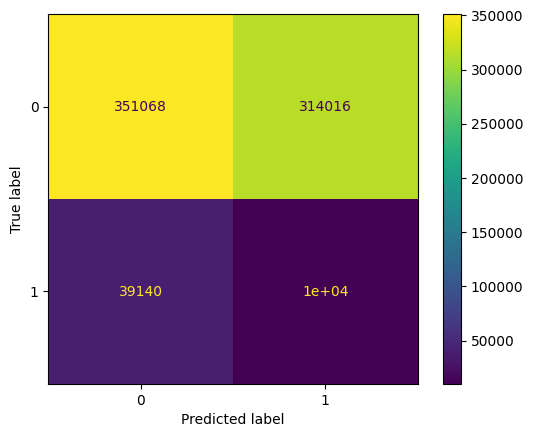

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train_new_features = df_train_with_new_features.drop(['outcome'],axis=1)
y_train_new_features = df_train_with_new_features['outcome']
X_test_new_features = df_test_with_new_features.drop(['outcome'],axis=1)
y_test_new_features = df_test_with_new_features['outcome']
# print(X_with_new_features.head(5))
# print(y_with_new_features.head(5))
# X_train_new_features, X_test_new_features, y_train_new_features, y_test_new_features = train_test_split(X_with_new_features, y_with_new_features, test_size=0.3, random_state=42, stratify=y_with_new_features)

dt_with_new_features_count = DecisionTreeClassifier()
dt_with_new_features_count.fit(X_train_new_features, y_train_new_features)
y_pred_with_new_features_count = dt_with_new_features_count.predict(X_test_new_features)

print("Classification Report:\n", classification_report(y_test_new_features, y_pred_with_new_features_count))

from sklearn.metrics import ConfusionMatrixDisplay
cm_dt_with_new_features = ConfusionMatrixDisplay.from_estimator(dt_with_new_features_count, X_test_new_features, y_test_new_features)

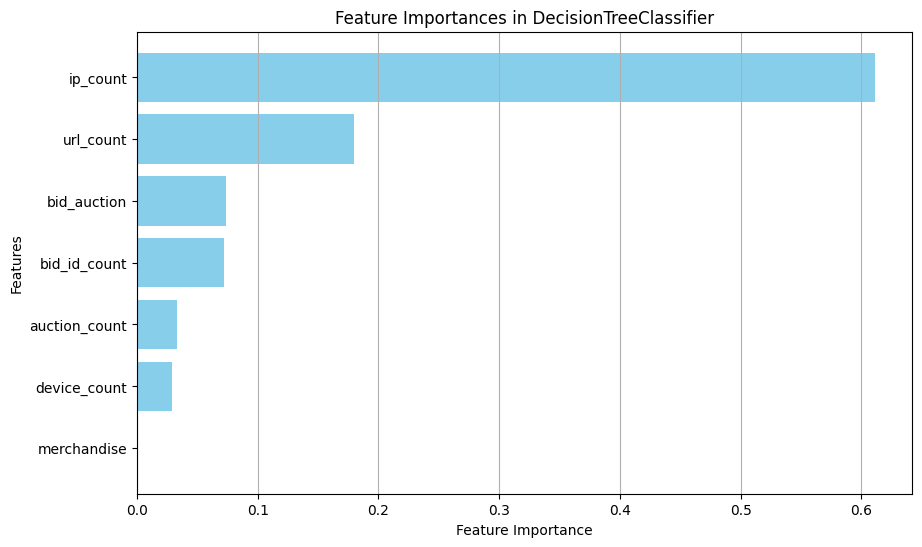

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Ottieni le importanze delle feature
feature_importances = dt_with_new_features_count.feature_importances_

# Ordina le feature per importanza decrescente
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = X_train_new_features.columns[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances in DecisionTreeClassifier")
plt.gca().invert_yaxis()  # Inverti l'asse Y per avere la feature più importante in alto
plt.grid(axis='x')
plt.show()

